In [25]:
from keras.models import load_model
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split

In [3]:
IMG_SIZE = (60, 60)

In [2]:
model = load_model('models/model.h5')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 8)         400       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 16)        3216      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 32)         0

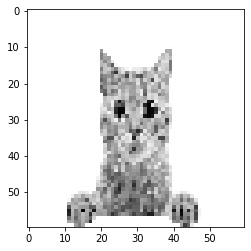

In [4]:
img1 = cv2.imread('files/cat.jpg')
img1 = cv2.cvtColor(cv2.resize(img1, IMG_SIZE), cv2.COLOR_BGR2GRAY)

plt.imshow(img1, cmap='gray')

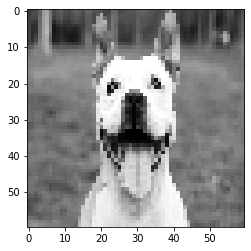

In [5]:
img2 = cv2.imread('files/dog.jpg')
img2 = cv2.cvtColor(cv2.resize(img2, IMG_SIZE), cv2.COLOR_BGR2GRAY)

plt.imshow(img2, cmap='gray')

In [8]:
img1 = np.expand_dims(img1, 2)
img2 = np.expand_dims(img2, 2)

images = [img1, img2]
images = np.array(images) / 255.

print(images.shape)

(2, 60, 60, 1, 1)


In [9]:
yhat = model.predict(images).round()
print(yhat)

[[0.]
 [1.]]


In [10]:
model_retrain = load_model('models/model.h5')

In [14]:
for layer in model_retrain.layers[:-2]:
    layer.trainable = False

for layer in model_retrain.layers:
    print(layer.trainable)

False
False
False
False
False
False
False
False
False
True
True


In [16]:
print(model_retrain.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 8)         400       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 16)        3216      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 32)         0

In [22]:
def load_data(data_dir):
    x = []
    names = os.listdir(data_dir)
    for name in names:
        img = cv2.imread(data_dir+name)
        img = cv2.cvtColor(cv2.resize(img, IMG_SIZE), cv2.COLOR_BGR2GRAY)
        img = np.expand_dims(img, 2)
        x.append(img)
    
    return x

In [23]:
x0 = load_data('dataset/no_tumor/')
x1 = load_data('dataset/meningioma_tumor/')

In [24]:
x = np.array(x0 + x1) / 255.
y = np.array(len(x0) * [0] + len(x1) * [1])
print(x.shape, y.shape)

(790, 60, 60, 1) (790,)


In [26]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.8)

In [27]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
20/20 [==============================] - 2s 63ms/step - loss: 0.5360 - accuracy: 0.7722 - val_loss: 0.3233 - val_accuracy: 0.9241
Epoch 2/10
20/20 [==============================] - 1s 38ms/step - loss: 0.2673 - accuracy: 0.9225 - val_loss: 0.2860 - val_accuracy: 0.9177
Epoch 3/10
20/20 [==============================] - 1s 27ms/step - loss: 0.1385 - accuracy: 0.9652 - val_loss: 0.2085 - val_accuracy: 0.9367
Epoch 4/10
20/20 [==============================] - 1s 40ms/step - loss: 0.0463 - accuracy: 0.9873 - val_loss: 0.1832 - val_accuracy: 0.9557
Epoch 5/10
20/20 [==============================] - 1s 29ms/step - loss: 0.0090 - accuracy: 0.9984 - val_loss: 0.2124 - val_accuracy: 0.9557
Epoch 6/10
20/20 [==============================] - 1s 42ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.2489 - val_accuracy: 0.9557
Epoch 7/10
20/20 [==============================] - 1s 26ms/step - loss: 7.9165e-04 - accuracy: 1.0000 - val_loss: 0.2521 - val_accuracy: 0.9557
Epoch 8/1